**1. 출력될 9개를 순서대로 쓰시오.**

3차원 텐서를 이해하는 형식에는 2가지가 있습니다.  
벡터안에 행렬이 있는 형식과 행렬안에 벡터가 있는 형식이지요.
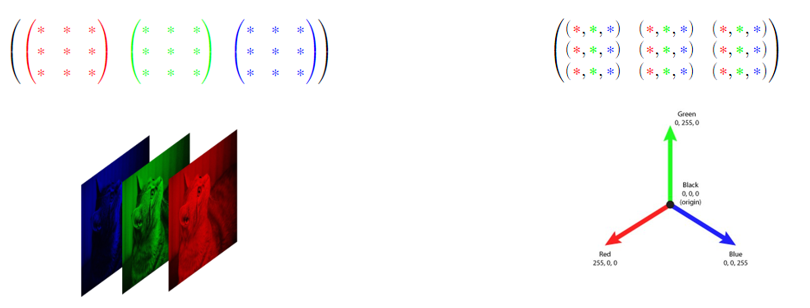
우리교재는 CNN 단원에서 이미지를 다룰때는 왼쪽 형식을 따르고 RNN 단원에서 말뭉치를 다룰때는 오른쪽 형식을 따릅니다.  
3차원 텐서 $x$를 두가지 형식으로 각각 써보면
$$
x = \begin{pmatrix} \begin{pmatrix} 0&1&2 \\ 3&4&5 \\ 6&7&8 \end{pmatrix} & \begin{pmatrix} 9&10&11 \\ 12&13&14 \\ 15&16&17 \end{pmatrix} \end{pmatrix}, \qquad
x = \begin{pmatrix} \begin{pmatrix} 0&1&2 \end{pmatrix} & \begin{pmatrix} 3&4&5 \end{pmatrix} & \begin{pmatrix} 6&7&8 \end{pmatrix} \\
\begin{pmatrix} 9&10&11 \end{pmatrix} & \begin{pmatrix} 12&13&14 \end{pmatrix} & \begin{pmatrix} 15&16&17 \end{pmatrix} \end{pmatrix}
$$
입니다.

In [1]:
import numpy as np

x=np.arange(18).reshape(2,3,3)

$i$는 왼쪽 형식에서 몇번째 행렬인지를 뜻하고 오른쪽 형식에서 몇번째 행인지를 뜻합니다.  
왼쪽은 무엇이 출력될지 자명하고 오른쪽은 각 행을 행렬형태로 다시 써주면 일치합니다.

In [2]:
for i in range(2):
    print(x[i,:,:])
    print('='*15)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 9 10 11]
 [12 13 14]
 [15 16 17]]


$j$는 왼쪽 형식의 각 행렬에서 몇번째 행인지를 뜻하고 오른쪽 형식에서 몇번째 열인지를 뜻합니다.  
오른쪽은 무엇이 출력될지 자명하고 왼쪽은 각 행을 행렬형태로 다시 써주면 일치합니다.

In [3]:
for j in range(3):
    print(x[:,j,:])
    print('='*15)

[[ 0  1  2]
 [ 9 10 11]]
[[ 3  4  5]
 [12 13 14]]
[[ 6  7  8]
 [15 16 17]]


$k$는 왼쪽 형식의 각 행렬에서 몇번째 열인지를 뜻하고 오른쪽 형식의 각 벡터에서 몇번째 원소인지를 뜻합니다.  
순서대로 뽑아서 차례대로 채워 넣으면 됩니다.

In [4]:
for k in range(3):
    print(x[:,:,k])
    print('='*15)

[[ 0  3  6]
 [ 9 12 15]]
[[ 1  4  7]
 [10 13 16]]
[[ 2  5  8]
 [11 14 17]]


**2. 7강 2번 문제를 TimeRNN 클래스로 검산을 하시오.**

7강 2번 문제에서는 RNN 순전파 메서드를 두번 실행했습니다.  
TimeRNN 클래스는 RNN 인스턴스를 연결하여 시간블럭 단위로 실행되기때문에 한번 실행하여 두 hidden state를 한번에 얻습니다.  
데이터도 시간블럭으로 묶어서 한번에 입력합니다.

In [5]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch 2') # 각자의 경로로 수정해주세요.
import numpy as np
from common.time_layers import TimeRNN

Wx=np.log(np.array([[2,2],[4,6]]))
Wh=np.array([[-5*np.log(2),-5*np.log(3)],[5*np.log(2),5*np.log(3)]])
b=np.zeros(2)

timernn=TimeRNN(Wx,Wh,b)

xs=np.array([[[-1,1],[2,-1]]])
hs=timernn.forward(xs)
print('hidden states : '+str(hs))

hidden states : [[[0.6 0.8]
  [0.6 0.6]]]


**3.  데이터에 대한 가중치 행렬 $W_x$, hidden state에 대한 가중치 행렬 $W_h$, 편향 벡터 $b$가 각각
$$
W_x = 0.01 \times \begin{pmatrix} 0&1&2 \\ 3&4&5 \\ 6&7&8 \end{pmatrix}, \qquad
W_h = 0.02 \times \begin{pmatrix} 0&1&2 \\ 3&4&5 \\ 6&7&8 \end{pmatrix}, \qquad
b=[0,0,0]
$$
인 RNN층을 생각하자.
배치크기가 3, 시간 블럭의 길이가 5, 벡터표현의 차원이 3인 데이터
$$
{\rm xs}=
\begin{pmatrix}
[0,1,2] & [1,2,3] & [2,3,4] & [3,4,5] & [4,5,6] \\
[1,2,3] & [2,3,4] & [3,4,5] & [4,5,6] & [5,6,7] \\
[2,3,4] & [3,4,5] & [4,5,6] & [5,6,7] & [6,7,8]
\end{pmatrix}
$$
가 RNN층으로 들어오고 위층에서 흘러들어온 미분은
$$
{\rm dhs}=
0.1 \times \begin{pmatrix}
[0,1,2] & [1,2,3] & [2,3,4] & [3,4,5] & [4,5,6] \\
[1,2,3] & [2,3,4] & [3,4,5] & [4,5,6] & [5,6,7] \\
[2,3,4] & [3,4,5] & [4,5,6] & [5,6,7] & [6,7,8]
\end{pmatrix}
$$
라 하자.**

**TimeRNN 클래스를 사용하여 hidden state의 묶음 $\rm hs$와
밑으로 흘려보내는 미분 $\rm dxs$와 파라미터들의 미분
$$
{\partial L \over \partial W_h},\qquad {\partial L \over \partial W_x}, \qquad {\partial L \over \partial b}
$$
을 수치적으로 구하시오.**

3차원 텐서 xs의 $(i,j,k)$ 번째 원소는 $i+j+k$입니다.

In [6]:
Wx=0.01*np.arange(9).reshape(3,3)
Wh=0.02*np.arange(9).reshape(3,3)
b=np.zeros(3)
timernn=TimeRNN(Wx,Wh,b)
xs=np.zeros((2,5,3))
for i in range(2):
    for j in range(5):
        for k in range(3):
            xs[i,j,k]=i+j+k


hs=timernn.forward(xs)
print('hidden states : '+str(hs))

dhs=0.1*xs
    
dxs = timernn.backward(dhs)

print('dxs :'+str(dxs))
print('dWx :'+str(timernn.grads[0]))
print('dWh :'+str(timernn.grads[1]))
print('db :'+str(timernn.grads[2]))

hidden states : [[[0.14888503 0.17808087 0.2069665 ]
  [0.26875445 0.33300075 0.39429718]
  [0.37763268 0.4677738  0.54913205]
  [0.47302666 0.57959527 0.6694489 ]
  [0.5546756  0.6693425  0.75905955]]

 [[0.23549575 0.2913126  0.34521404]
  [0.37041536 0.45923775 0.53973764]
  [0.47175303 0.5781708  0.6679865 ]
  [0.5544949  0.6691525  0.75887835]
  [0.62380785 0.7401744  0.8244374 ]]]
dxs :[[[0.00739009 0.02138349 0.03537689]
  [0.00954545 0.03083838 0.05213131]
  [0.0102718  0.03570287 0.06113395]
  [0.00984277 0.03658173 0.06332068]
  [0.00784585 0.03206249 0.05627913]]

 [[0.00996696 0.03208497 0.05420299]
  [0.01045696 0.03627567 0.06209438]
  [0.01007852 0.03733464 0.06459075]
  [0.00913261 0.03610006 0.06306752]
  [0.00719709 0.03122496 0.05525284]]]
dWx :[[ 6.24295275  7.23555178  7.61387839]
 [ 8.22781026  9.95043875 10.84283972]
 [10.21266776 12.66532572 14.07180105]]
dWh :[[0.73194176 0.84423409 0.8831284 ]
 [0.89705042 1.03578482 1.08424891]
 [1.03998498 1.20397786 1.26275